In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
 

1.Generate random data in in a two-dimensional space. You can genearate a dataset with 100 data points for example, can also use some rules to genearate a dataset with a potential number of clusters.

In [12]:
array = -2*np.random.rand(100, 3)-1
X1 = 2*np.random.rand(50,3)
array[50:100, :] = X1

2.Plot and inspect the data distritution.

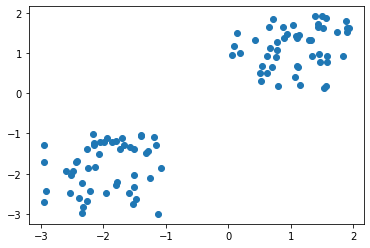

In [4]:
plt.scatter(array[:, 0], array[:,1])
plt.show()

3.Use sklearn.cluster.KMeans and process the generated data.

In [5]:
Kmean = KMeans(n_clusters = 3)
Kmean.fit(array)

KMeans(n_clusters=3)

4.Use Kmean.cluster_centers_ to find the centroides and display them.

In [6]:
centers = Kmean.cluster_centers_
print(centers)

[[-1.81207285 -1.31208188]
 [ 1.08194444  1.1369413 ]
 [-2.10883682 -2.3584693 ]]


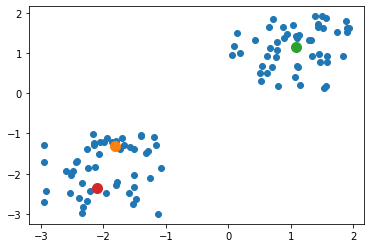

In [7]:
plt.scatter(array[:,0],array[:,1])
plt.scatter(centers[0,0], centers[0,1], s=100)
plt.scatter(centers[1,0], centers[1,1], s=100)
plt.scatter(centers[2,0], centers[2,1], s=100)
plt.show()

5.Test the algorithm by predicting the cluster of a data point using Kmean.predict.

In [8]:
kmeans = KMeans(n_clusters=3, random_state=10).fit(array)
print(kmeans.inertia_)

41.767217694592645


6.Use sklearn.cluster.AgglomerativeClustering to analyse the data. Try different linkage methods and distance measurements and compare the results.

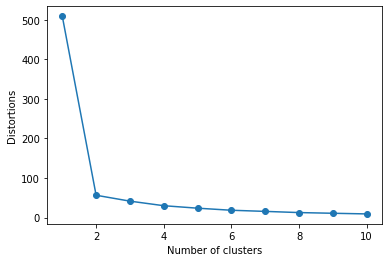

In [9]:
distortions = []

for i in range(1,11):
    kalg=KMeans(n_clusters=i)
    cluster_labels=kalg.fit(array)
    distortions.append(kalg.inertia_)
    
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Distortions")
plt.show()

7.You can also use sklearn.cluster.DBSCAN to process the data.

d:\program-files\python38\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


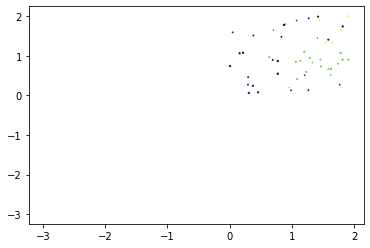

In [13]:
from sklearn.cluster import DBSCAN
y_pred = DBSCAN().fit_predict(array)
plt.scatter(array[:, 0], array[:, 1], array[:, 2], c=y_pred)
plt.show()

8.Assess the cluster validity using different quality indices.

In [10]:
for n_clusters in range(2,11):
    cluster = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = cluster.fit_predict(array)
    
    silhouette_avg = silhouette_score(array, cluster_labels)
    print("For n_cluster = ", n_clusters,
         "The average silhouette_score is:",silhouette_avg)
    
    davies_bouldin_avg = davies_bouldin_score(array, cluster_labels)
    print("For n_cluster = ", n_clusters,
         "The average davies_bouldin_score is:",davies_bouldin_avg)
    
    calinski_harabasz_avg = calinski_harabasz_score(array, cluster_labels)
    print("For n_cluster = ", n_clusters,
         "The average calinski_harabasz_score is:",calinski_harabasz_avg)
    print("------------------------------------")
    

For n_cluster =  2 The average silhouette_score is: 0.7546810858661404
For n_cluster =  2 The average davies_bouldin_score is: 0.3569734675173688
For n_cluster =  2 The average calinski_harabasz_score is: 674.8559624676788
------------------------------------
For n_cluster =  3 The average silhouette_score is: 0.5955047204776767
For n_cluster =  3 The average davies_bouldin_score is: 0.6910523452502825
For n_cluster =  3 The average calinski_harabasz_score is: 449.55133558127187
------------------------------------
For n_cluster =  4 The average silhouette_score is: 0.40688004901446173
For n_cluster =  4 The average davies_bouldin_score is: 0.9990735852965456
For n_cluster =  4 The average calinski_harabasz_score is: 422.3495791088221
------------------------------------
For n_cluster =  5 The average silhouette_score is: 0.4296891388499855
For n_cluster =  5 The average davies_bouldin_score is: 0.8269089943481152
For n_cluster =  5 The average calinski_harabasz_score is: 410.714078726

In [11]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
cluster.fit_predict(array)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

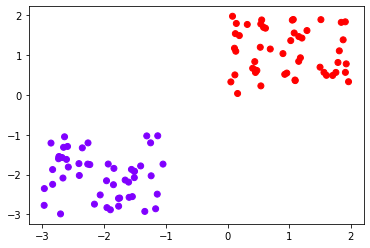

In [12]:
plt.scatter(array[:,0], array[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

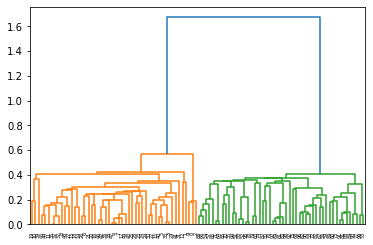

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(array, 'single')
labelList = range(0, 100)

dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True)
plt.show()

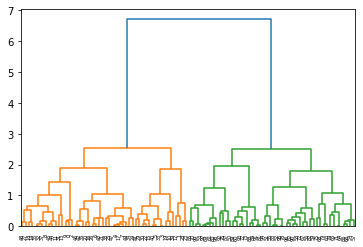

In [14]:
linked = linkage(array, 'complete')
labelList = range(0, 100)

dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True)
plt.show()

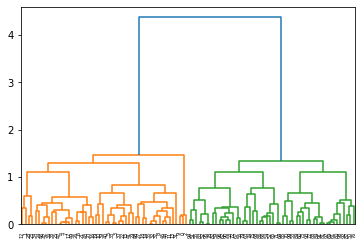

In [15]:
linked = linkage(array, 'average')
labelList = range(0, 100)

dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True)
plt.show()

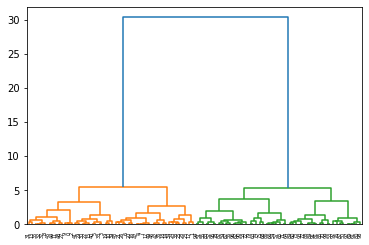

In [16]:
linked = linkage(array, 'ward')
labelList = range(0, 100)

dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True)
plt.show()

In [17]:
def getScores():
    model1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
    pred = model1.fit_predict(array)
    
    silhouette_scores = []
    davies_bouldin_scores = []
    ch_scores = []
    
    silhouette_avg = silhouette_score(array, pred)
    silhouette_scores.append(silhouette_avg)
    print('s=Silhouette score for model', ':', silhouette_avg)
    
    davies_bouldin_avg = davies_bouldin_score(array, pred)
    davies_bouldin_scores.append(davies_bouldin_avg)
    print('s=Davies Bouldin Score for model', ':', davies_bouldin_avg)
    
    calinski_harabasz_avg = calinski_harabasz_score(array, pred)
    ch_scores.append(calinski_harabasz_avg)
    print('s=Calinski Harabasz Score for model', ':', calinski_harabasz_avg)
    print('\n')
    
    return silhouette_scores, davies_bouldin_scores, ch_scores

In [18]:
silhouette_scores, davies_bouldin_scores, ch_scores = getScores()

s=Silhouette score for model : 0.7546810858661404
s=Davies Bouldin Score for model : 0.3569734675173688
s=Calinski Harabasz Score for model : 674.8559624676788


